### Import necessary libraries

In [40]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Coins ID

In [14]:
KAS="kaspa"
TARA="taraxa"
MAZZE="mazze"
MEER="qitmeer-network"


### Function to fetch market cap data from CoinGecko

In [39]:
def fetch_market_cap(coin_id, vs_currency="usd", days="365"):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    headers = {"accept": "application/json"}
    params = {"vs_currency": vs_currency, "days": days}
    response = requests.get(url, params=params, headers=headers)
    data = response.json()
    market_caps = data.get("market_caps", [])
    df = pd.DataFrame(market_caps, columns=["timestamp", f"{coin_id}_market_cap"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
    df.set_index("date", inplace=True)
    df = df.drop("timestamp", axis=1)
    return df


### Fetch market cap data for Bitcoin, Ethereum, and BNB


In [41]:
kas = fetch_market_cap(KAS)
tara = fetch_market_cap(TARA)

### Combine the data into a single DataFrame


In [42]:
combined = kas.join(tara, how="inner") # do another inner(other_coin, how="inner") for more
combined.ffill(inplace=True)

### Plot historical market caps


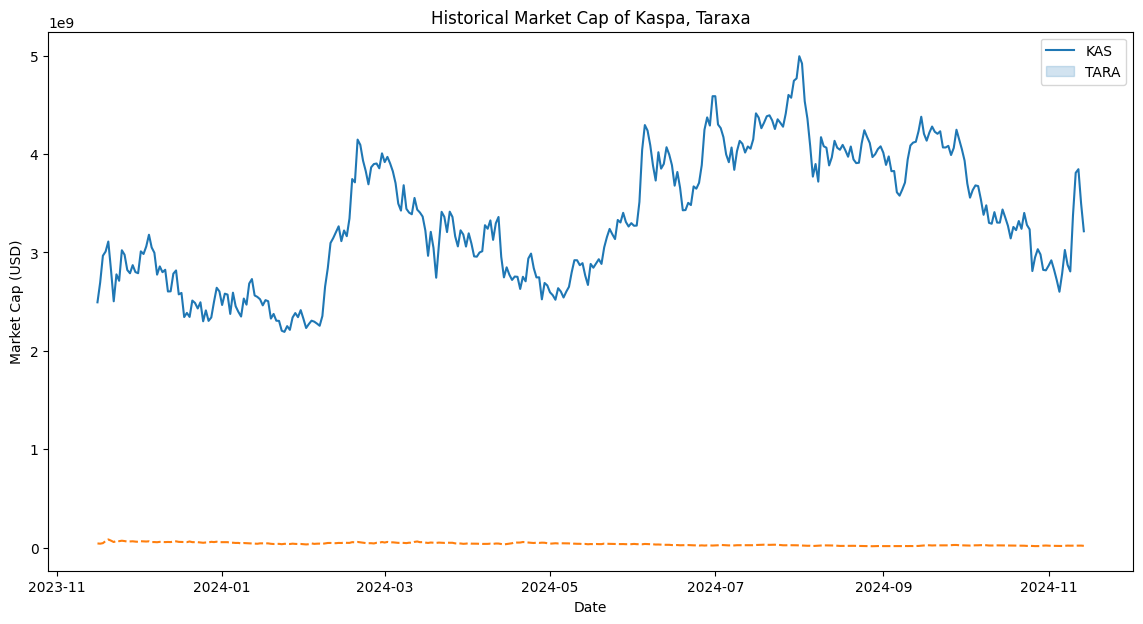

In [43]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined)
plt.title("Historical Market Cap of Kaspa, Taraxa")
plt.xlabel("Date")
plt.ylabel("Market Cap (USD)")
plt.legend(["KAS", "TARA"])
plt.show()



### Calculate total market cap for dominance calculation


In [44]:
combined["total_market_cap"] = combined.sum(axis=1)


### Calculate dominance percentages


In [47]:
combined["kaspa_dominance"] = (
    combined["kaspa_market_cap"] / combined["total_market_cap"]
) * 100
combined["taraxa_dominance"] = (
    combined["taraxa_market_cap"] / combined["total_market_cap"]
) * 100

### Plot dominance percentages


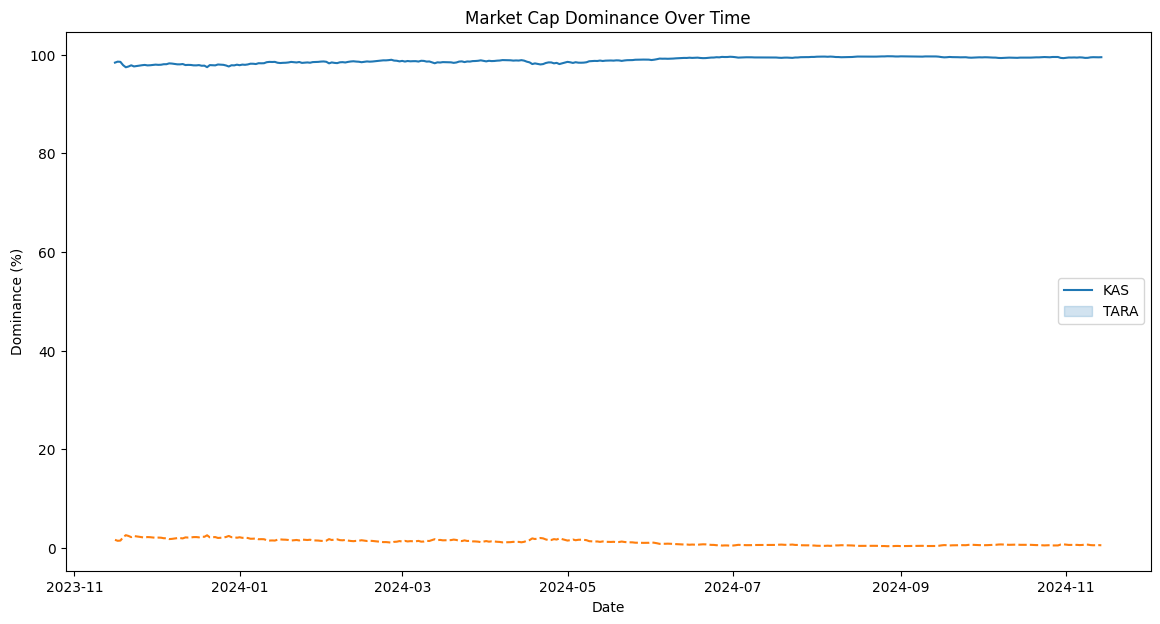

In [48]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=combined[["kaspa_dominance", "taraxa_dominance"]]
)
plt.title("Market Cap Dominance Over Time")
plt.xlabel("Date")
plt.ylabel("Dominance (%)")
plt.legend(["KAS", "TARA"])
plt.show()
